# Machine Learning (ML)


## Topics

* Classification (with a class separating hyperplane)
* The Cost Function $J$ and its 1st Derivative (Slope)
* Gradient Descend
* Regression

## Classification

The **Formula** of a linear equation:

$f(x) = y = w_1*x_1 + w_2*x_2 + b$

with $b$ = intercept/y-offset and $w$ = slope.

* Example: $~~~~~~~~y= -0.5x_1 + 2x_2 + 1.5$

Classification is a process of finding a hyperplane that divides multiple data points into the respective class based on different features.

As an example we will us the following data points and their respective classes:<br>
$Class+: p_1 = \langle 0.5, 3\rangle$, $p_2 = \langle 0.4, 7\rangle$, and $Class-: p_3 = \langle 0.5, 0.6\rangle$, $p_4 = \langle 0.2, -1\rangle$.<br>
Remeber that to project a hyperplane into feature space we need the y as carrier of the specific class.<br>
Note: In python the y and therefore class information is the last number of the point array (in our example at index 2, position 3).

Look at the code below and its output. The code inserts the points and the initial hyperplane in a three-dimensional space.

In [5]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np

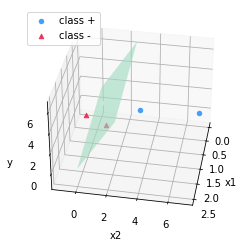

In [21]:
# Specifying the points with the class included (index 2, position 3)
p1 = [0.5, 3, 1]
p2 = [0.4, 7, 1]
p3 = [0.5, 0.6, -1]
p4 = [0.2, -1, -1]

# Creation of the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grid configuration (evenly spaced numbers over a specified interval)
x1 = np.linspace(0, 2.5, 2)
x2 = np.linspace(0, 2.5, 2)

# Creation of the grid and defining the initial hyperplane
X1, X2 = np.meshgrid(x1, x2)
y = -0.5*X1 + 2*X2 + 1.5

# Try commenting this out to see that, at the moment, three points lie beneath the plane (the points on the right)
# and one point lies above the hyperplane (the point on the left)
ax.plot_surface(X1, X2, y, color='#baffde', alpha=0.6)

# Plotting the points (colours are the intended class)
ax.scatter(0.5, 3, 1, c='#409fff', marker='o', label='class +')
ax.scatter(0.4, 7, 1, c='#409fff', marker='o')
ax.scatter(0.5, 0.6, -1, c='#f2305d', marker='^', label='class -')
ax.scatter(0.2, -1, -1, c='#f2305d', marker='^')

ax.scatter(0, 0, 0, c='w', marker='^')
ax.legend(loc='upper left')

# Adjusting the view of the 3D graph
# if you want to make all 3D graphs comparable, either set these values to the same ones or comment out this line
ax.view_init(35, 10)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

This hyperplane is not ideal, we will update it further below.

Based on the above linear equation:    
$~~~~~~~~y= -0.5x_1 + 2x_2 + 1.5$<br>
we can write a function in python that return the result of the initial hyperplane's classification (see code below).

In [22]:
def f(p):  # p is a vector
    '''
    This function returns the result of the initial hyperplane's classification
    '''
    x1, x2, y = p
    return -0.5*x1 + 2*x2 + 1.5

### Question 1

Given the same linear equation as above, $-0.5x_1 + 2x_2 + 1.5$, and the following points:<br>
$Class+: \langle 2, -1.5\rangle, \langle 1, 0.5\rangle$ and $Class-: \langle -0.5, 0.4\rangle$.

1. Define the points including the class label (e.g. $[x_1,x_2,label]$) and insert them into the linear equation, by calling the above $f(point)$ function for each point and printing out the results. Do not forget to answer the question below.
2. Visualize result1, result2 and result3 and check if the classification is correct.

In [23]:
### Step 1 ###

# Defining the points
p1 = [2, -1.5, 1]
p2 = [1, 0.5, 1]
p3 = [-0.5, 0.4, -1]

# Calling the f(p) function once for each point
var_1 = f(p1)
var_2 = f(p2)
var_3 = f(p3)

# Printing of the predicted classes (these are actually predicted y-values though, not classes)
print(var_1, var_2, var_3)


# How would you classify each point?
print(np.sign(var_1), np.sign(var_2), np.sign(var_3))

# use a step function (?)
# -2.5 => class-
# 2.0 => class +
# 2.55 => class +

-2.5 2.0 2.55
-1.0 1.0 1.0


Now, we plot it all in a three-dimensional space. <br> <em>Hint: If you do not know how to make plots using the package matplotlib, get inspired by looking at the code for plots in this notebook and/or the official documentation.</em>

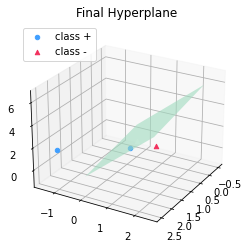

In [24]:
### STEP 2 ###

# Creation of the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grid configuration (evenly spaced numbers over a specified interval)
x1 = np.linspace(0, 2.5, 2)
x2 = np.linspace(0, 2.5, 2)

# Creation of the grid and defining the initial hyperplane
X1, X2 = np.meshgrid(x1, x2)
y = -0.5*X1 + 2*X2 + 1.5

# Plotting the points (colours are the intended class)
ax.scatter(2, -1.5, 1, c='#409fff', marker='o', label='class +')
ax.scatter(1, 0.5, 1, c='#409fff', marker='o')

ax.scatter(-0.5, 0.4, -1, c='#f2305d', marker='^', label='class -')

ax.scatter(0, 0, 0, c='w', marker='^')
ax.legend(loc='upper left')

plt.title("Final Hyperplane")
ax.view_init(25, 30)

ax.plot_surface(X1, X2, y, color='#baffde', alpha=0.6)

plt.show()

As you can see, the plane does not clearly separate the two classes. 

## The Cost Function $J$ and its 1st Derivative (Slope)

**The goal of classification is to find a hyperplane that accurately predicts to which class a point belongs.**

### How to find the hyperplane

To find the best fitting hyperplane we need to define a so-called cost function $J$ (also known as error function), which tells us how far off our current hyperplane is. This is done by calculating the difference between the prediction and the real value and squaring the result. By setting the first derivative of the cost function to zero and resolving it to $w$ we can update the hyperplane (i.e. weights) to improve the prediction.<br>

**The goal is to find a weight vector such that the prediction error is minimal.**

![image](figures/error_vis.png)

### The cost function and its minimum
    
   $$J(w) = \sum_{j=0}^M(y_{obs}^j-y_{pred}^j)^2~~~ or~~~ J(w)=\sum_{j=0}^n(y^j-\sum_k w_k*x_k^j)^2$$
   with a partial derivative (wrt $w_i$):
   
   
   $$\frac{\delta J(w)}{\delta w_i}=-\sum_{j=0}^n(y^j-\sum_{k=0}^m w_k*x_k^j)x_i^j$$

<em><b>We will work with the same function and points as above (Question 1).</b></em>

In [25]:
# Using the same points as above
points = [p1, p2, p3]

# Our starting weight vector, including the bias
w = [1.5, -0.5, 2]

def costJ(w, x1, x2, y):
    x = [1, x1, x2]
    return (y - np.dot(w, x))**2

def sum_of_costJ(w):
    '''
    The cost function J calculates how far off our current hyperplane is
    '''
    total_cost = 0
    for point in list(points):
        total_cost += costJ(w, point[0], point[1], point[2])
        
    return total_cost

sum_of_costJ(w)

25.8525

In [26]:
def derivative_J(w, x1, x2, y):
    x = [1, x1, x2]
    return np.dot((y - np.dot(w, x)), x)

def slope_of_cost_function_at_w(w):
    '''
    To minimize the cost (error) we take the 1st derivative of J 
    '''
    total = 0
    for point in list(points):
        total += derivative_J(w, point[0], point[1], point[2])
        
    return -total

slope_of_cost_function_at_w(w)

array([ 1.05 , -7.775,  7.17 ])

So far, we have for an intial $\vec{w}$ of $\langle1.5, -0.5, 2\rangle$, cost (error) of $25.8525$ and the adapted $\vec{w}$ of $\langle1.05, -7.775, 7.17\rangle$ (slopes).

##  Gradient Descent

To minimize the error we have to adapt the weights not just one time but multiple times. To do this we need an iterative approach called gradient descent.

We initialize $w$ randomly, we apply $J$ and its 1st derivative to get the slope at a particular point on the curve:

![image](figures/gradient_descend.png)

This point will have a sign, it will either be plus or minus:
* if it has a plus sign, then we have to decrease the weight (we are to the right of the minimum)
* if it has a minus sign, we have to increase the weight (we are to the left of the minimum)

In order to avoid missing the minimum, we should adapt the weights slowly. To do this we have to define a learning rate $\eta$ (usually small):

$$\Delta(w_j)=-\eta \frac{\partial  J}{\partial w_j}$$

i.e. for each weight $w_j$ we determine a delta, some correction of the weight, scaled by $\eta$

* if the slope is negative, we get a plus (minus * minus = plus). The adapted weight is then: $w_j=w_j+\Delta w_j$
* if the slope is positive, we get a minus (minus * plus = minus). The adapted weight is then: $w_j=w_j-\Delta w_j$

### Question 2

In our gradient descent scenario (see output of function $slope\_of\_cost\_function\_at\_w(w)$), the first derivative of the weight $w_1$ (weight of $x_1$) is $-7.775$ and the first derivative of the weight $w_2$ (weight of $x_2$) is $7.17$ . What does this mean for $w_1$ and $w_2$?

In [9]:
# Answer to Question 2:

# w1 adapted weight: 𝑤𝑗=𝑤𝑗+Δwj as first derivative has a minus sign, so we are to the left of the minimum and we need to increase the weight
# w2 adapted weight: 𝑤𝑗=𝑤𝑗-Δwj as first derivative has a plus sign, so we are to the right of the minimum and we need to decrease the weight

In [27]:
# Gradient Descent for Hyperplane Learning (Minimizing the Error)

# Defining the number of iterations it will adapt the weights
epochs = 1000

# Defining the learning rate
eta = 0.01 

# Storing all weights, bias, and errors for a visualisation
w1List, w2List, bList, eList = [], [], [], []

for i in range(epochs):
    # Appending the current weight and error to the corresponding lists
    w1List.append(w[1])
    w2List.append(w[2])
    bList.append(w[0])
    eList.append(sum_of_costJ(w))
    
    # Minimizing the error (weight adaptation)
    w = w + (-eta * slope_of_cost_function_at_w(w))

In [11]:
# Printing out the final weight
print(f'Final weight of b (intercept): {w[0]}\nFinal weight of x1: {w[1]}\nFinal weight of x2: {w[2]}')

Final weight of b (intercept): -0.6099986551635744
Final weight of x1: 1.286473705185907
Final weight of x2: 0.6411130114825145


In [12]:
# Printing out the list of weights, bias and errors in steps of 50 epochs
w1List[::50], w2List[::50], bList[::50], eList[::50]

([-0.5,
  0.6490463683223632,
  0.83587926865744,
  0.9503313648435322,
  1.0318168378807715,
  1.0924444010780432,
  1.138424570870936,
  1.1735831651201063,
  1.2005599713560113,
  1.221288799403241,
  1.2372262542116312,
  1.249482886484621,
  1.2589097703863248,
  1.2661605341245286,
  1.2717376165607475,
  1.2760273822779462,
  1.2793269831671834,
  1.2818649725479627,
  1.283817146069025,
  1.2853187214172226],
 [2,
  0.5868013303851539,
  0.3577652704696033,
  0.34828600806578447,
  0.3926404179442432,
  0.4432147034334427,
  0.48736678566339575,
  0.5230034107042187,
  0.5509491396932221,
  0.5726150959659141,
  0.5893345914344653,
  0.6022122896659599,
  0.6121231194617207,
  0.6197481144780802,
  0.6256136833701891,
  0.6301255500415093,
  0.6335960514841362,
  0.636265515016209,
  0.6383188225909374,
  0.6398981904729544],
 [1.5,
  0.4535251120775742,
  -0.07918943280682829,
  -0.2953838124754074,
  -0.39837281677416647,
  -0.45736781121493847,
  -0.49629248798235925,
  -0.5

### Question 3

Plot the progression of the weights and the error (x-axis: weights, y-axis: errors).<br>
<em>Hint: If you do not know how to make plots using the package matplotlib, get inspired by looking at the code for plots in this notebook and/or the official documentation.</em>

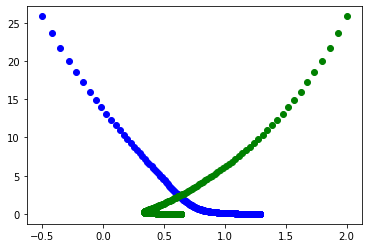

In [28]:
# Plotting the progression of the weights, bias and the errors

# the first element of the lists is where the axes will start
plt.plot(w1List, eList, 'bo')
plt.plot(w2List, eList, 'go')

plt.show()

Now we can plot the new hyperplane to see how the classification has changed.

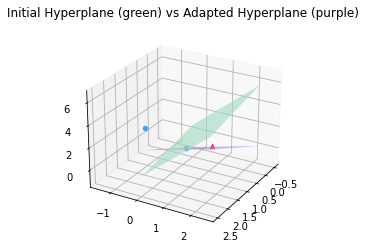

In [14]:
# Creation of the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grid configuration (evenly spaced numbers over a specified interval)
x1 = np.linspace(0,2.5,2)
x2 = np.linspace(0,2.5,2)

# Creation of the grid
X1,X2 = np.meshgrid(x1,x2)

# Plotting the initial hyperplane
y_old = -0.5*X1 + 2*X2 + 1.5
ax.plot_surface(X1, X2, y_old, color='#baffde', alpha=0.6)

# Plotting the new hyperplane
y_new = w[1]*X1 + w[2]*X2 + w[0]
ax.plot_surface(X1, X2, y_new, color='#ab88cf', alpha=0.6)

# Plotting the points (colours are the intended class)
ax.scatter(0.5, -1.5, 1, c='#409fff', marker='o')
ax.scatter(1, 0.5, 1, c='#409fff', marker='o')

ax.scatter(-0.5, 0.4, -1, c='#f2305d', marker='^')

plt.title("Initial Hyperplane (green) vs Adapted Hyperplane (purple)")
# due to a bug in the Poly3DCollection, it is currently not possible to add a legend for the hyperplanes
ax.view_init(25, 30) # try changing these values to see how it rotates

plt.show()

Because the threedimensional visualization can also become confusing, we can show that the adapted function works better than the original by rewriting it.

In [15]:
def f_adapted(p):
    '''
    This function returns the result of the adapted hyperplane of
        y = 1.286473705185907*x1 + 0.6411130114825146 * x2 - 0.6099986551635744
    '''
    x1, x2, y = p
    return w[1]*x1 + w[2]*x2 + w[0]

result1, result2, result3 = f(p1), f(p2), f(p3)
result1_adapted, result2_adapted, result3_adapted = f_adapted(p1), f_adapted(p2),f_adapted(p3)

for org, adap in zip([result1, result2, result3], [result1_adapted, result2_adapted, result3_adapted]):
    print(f'Original: {np.sign(org)}\tAdapted: {np.sign(adap)}')

Original: -1.0	Adapted: 1.0
Original: 1.0	Adapted: 1.0
Original: 1.0	Adapted: -1.0


We can see that the classification is now correct for all points.

By setting $y=0$, we can project the classifier into the feature space.

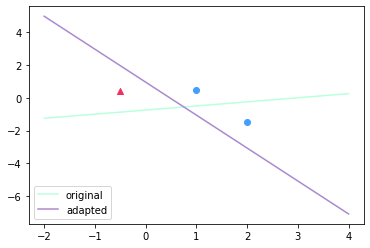

In [16]:
# The same points as above
plt.scatter(2, -1.5, c='#409fff',marker='o')
plt.scatter(1, 0.5, c='#409fff',marker='o')

plt.scatter(-0.5, 0.4, c='#f2305d',marker='^')

# Initial hyperplane
plt.plot([4, -2], [0.25, -1.25], c='#baffde', linestyle = '-', label = 'original')

# Adapted hyperplane
plt.plot([4, -2], [-7.075033706, 4.964719181], c='#ab88cf', linestyle = '-', label='adapted')


plt.legend(loc='lower left')
plt.show()

## Regression

Linear equations and the gradient descent are also used for regression, not only classification. These two concepts use the same tools to achieve different goals.    
Regression is the process of using features of items (independent/predictor variables) to predict a dependent variable. 
The dependent variable is what we call y, the independent variables are the different x<sub>1</sub>, x<sub>2</sub>, …, x<sub>n</sub>.   
For example, we might want an equation that describes how many homophones a given word has. We could use <em>syllable complexity, word length, </em> and <em>word frequency</em> as our predictors (of course, we need to express them numerically).    
The equation we are looking for accurately combines these variables with a certain weight per variable and yields a prediction for the number of homophones that a given word has.    

$$
w_1 \cdot syllable\;complexity + w_2 \cdot word\;length + w_3 \cdot word\;frequency + b = number\;of\;homophones
$$

## Example
![image](figures/regression_line_mfcl.png)   

In a plot that has been reduced to two dimensions, we cannot show all the different features that are responsible for predicting the dependent variable.

For the next steps we will use the function $f(x)=-0.5x + 1.5$ and the following points; $\langle x=2, y=2\rangle$, $\langle x=1, y=0.4\rangle$ and $\langle x=2, y=0.5\rangle$.

We can predict our y-values ($y_1, y_2, y_3$) with the dot product or by doing the calculations explicitly (see code below).

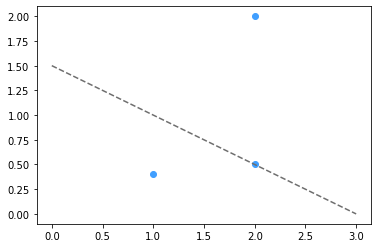

Predicting y1 via dot product: 0.5 or explicitly: 0.5
Predicting y2 via dot product: 1.0 or explicitly: 1.0
Predicting y3 via dot product: 0.5 or explicitly: 0.5


In [20]:
x1=[1,2] # absorbing the intercept (bias) into the feature vector x1 by setting 1 at index 0 (first dimension)
x2=[1,1] # absorbing the intercept (bias) into the feature vector x2 by setting 1 at index 0 (first dimension)
x3=[1,2] # absorbing the intercept (bias) into the feature vector x3 by setting 1 at index 0 (first dimension)

y1=2
y2=0.4
y3=0.5

# Defining the weights
w=[1.5,-0.5] # absorbing the intercept (bias) into w at index 0 (first dimension)

# Plotting the initial regression line
plt.plot([0,3],[1.5,0], c='#6e6e6e', linestyle = '--')

# Plotting the points
plt.scatter([2,1,2],[2,0.4,0.5], color='#409fff')

plt.show()

# Prediction of y1, y2 and y3 given x1, x2 and x3
# Note the notation difference when calculating the prediction with the dot product or doing the calculations explicitly.
print("Predicting y1 via dot product:",np.dot(w,x1), "or explicitly:", x1[0]*w[0]+x1[1]*w[1])
print("Predicting y2 via dot product:",np.dot(w,x2), "or explicitly:", x2[0]*w[0]+x2[1]*w[1])
print("Predicting y3 via dot product:",np.dot(w,x3), "or explicitly:", x3[0]*w[0]+x3[1]*w[1])

### Question 4

1. Plot point $(x_1, y_1)$ and its prediction.<br>
2. What can be said about the relationship between the first $(x_1, y_1)$ and third $(x_3, y_3)$ point?

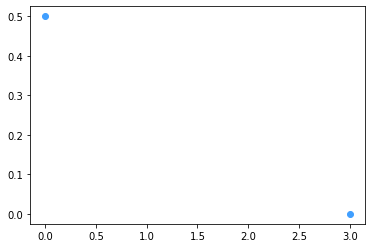

In [23]:
# Plotting the initial regression line
## TO-DO ##


# Plot of x1 and its prediction
## TO-DO ##


plt.show()

In [24]:
# Answer to Question 4.2: ## TO-DO ##


In [30]:
def slope_of_cost_function_at_w(j):  
    return -((y1-np.dot(w,x1))*x1[j]+    
             (y2-np.dot(w,x2))*x2[j]+
             (y3-np.dot(w,x3))*x3[j])  

eta=0.01
epochs=1000

for i in range(epochs):
    w[0]= w[0] + (-eta * slope_of_cost_function_at_w(0))
    w[1]= w[1] + (-eta * slope_of_cost_function_at_w(1))
    
w

[-0.08471041060999147, 0.6434471942616604]

In [31]:
print("Learned function: f(x)=",w[1],"* x +",w[0])

Learned function: f(x)= 0.6434471942616604 * x + -0.08471041060999147


### Question 5

Once again plot the three points $\langle x=2, y=2\rangle$, $\langle x=1, y=0.4\rangle$ and $\langle x=2, y=0.5\rangle$ and the now updated regression line.<br>
Tipp: If you do not know how to make plots using the package matplotlib, get inspired by looking at the code for plots in this notebook and the official documentation.
1. What do you notice? How has the line changed?

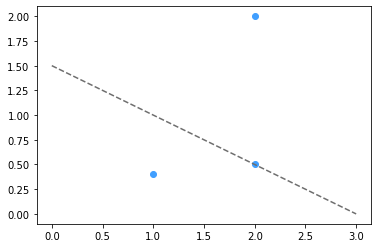

In [25]:
# Plotting the initial regression line
## TO-DO ##

plt.plot([0,3],[1.5,0], c='#6e6e6e', linestyle = '--')

# Plotting the new regression line
## TO-DO ##



# Plotting the points
## TO-DO ##

plt.scatter([2,1,2],[2,0.4,0.5], color='#409fff')

plt.show()

In [ ]:
# Answer to Question 5.1: ## TO-DO ##